
# Imports


In [152]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import hvplot.pandas
import ipywidgets as widgets

###import pandas library and pathlib library to read in csv.
from pathlib import Path

# Load enviromental variables

In [96]:
load_dotenv()
api_key = os.getenv("X_RAPID_API_KEY")
mashvisor_key = os.getenv("MASHVISOR")

## Based on the initial assesment of population growth and job growth turn the selected states and cities into a dictionary.


In [97]:
# Create Population Growth By City Dictionary (Data from US Census)

pop_growth_dict = {'city': ['Austin, TX', 'Orlando, FL', 'Houston, TX', 'San Antonio, TX', 'Dallas, TX', 'Charlotte, NC', 'Jacksonville, FL', 'Tampa, FL', 'Atlanta, GA', 'Miami, FL'],
             'pop_growth_by_city': [25.84, 19.69, 17.36, 16.59, 16.58, 15.33, 13.71, 13.07, 12.15, 11.11]}


# turn dictionary into a dataframe
pop_growth_df = pd.DataFrame.from_dict(pop_growth_dict)
pop_growth_df.set_index("city")

,pop_growth_by_city
city,
"Austin, TX",25.84
"Orlando, FL",19.69
"Houston, TX",17.36
"San Antonio, TX",16.59
"Dallas, TX",16.58
"Charlotte, NC",15.33
"Jacksonville, FL",13.71
"Tampa, FL",13.07
"Atlanta, GA",12.15


# Population growth by city plot

In [98]:
# Plot Population Growth by City

pop_growth_df.hvplot.bar(
    x='city', 
    y='pop_growth_by_city',
    ylabel='Population Growth (%)', 
    xlabel='City',
    rot=45,
    ylim=(5, 45),
    title='Population Growth by City -- Major "Sun Belt" Markets', 
).opts(
    yformatter='%.0f',
    color="blue",
    hover_color="orange")

:Bars   [city]   (pop_growth_by_city)


# Job growth by city dataframe

In [99]:
# Create Job Growth By City Dictionary (Data from US Census)

job_growth_dict = {'city': ['Dallas, TX', 'Charlotte, NC', 'Atlanta, GA', 'Miami, FL', 'Tampa, FL', 'Orlando, FL', 'Jacksonville, FL', 'Austin, TX', 'San Antonio, TX', 'Houston, TX'],
             'job_growth_by_city': [6.5, 5.7, 5.4, 5.2, 5.1, 4.9, 4.8, 4.7, 4.6, 3.2]}

job_growth_df = pd.DataFrame.from_dict(job_growth_dict)
job_growth_df.set_index("city")

,job_growth_by_city
city,
"Dallas, TX",6.5
"Charlotte, NC",5.7
"Atlanta, GA",5.4
"Miami, FL",5.2
"Tampa, FL",5.1
"Orlando, FL",4.9
"Jacksonville, FL",4.8
"Austin, TX",4.7
"San Antonio, TX",4.6


# Job growth plot

In [100]:
# Plot Job Growth by City

job_growth_df.hvplot.bar(
    x='city', 
    y='job_growth_by_city',
    ylabel='Job Growth (%)', 
    xlabel='City',
    rot=45,
    ylim=(2, 8),
    title='Job Growth by City -- Major "Sun Belt" Markets', 
).opts(
    yformatter='%.0f',
    color="blue",
    hover_color="orange")

:Bars   [city]   (job_growth_by_city)

# Quality of Life Index (QOLI) Dictionary (Data from Numbeo) & DataFrame

In [101]:
# Begin City-Level Data 
# Create Quality of Life Index (QOLI) Dictionary (Data from Numbeo)

qoli_dict = {'city': ['Jacksonville, FL', 'Orlando, FL', 'Tampa, FL', 'San Antonio, TX', 'Austin, TX', 'Dallas, TX', 'Charlotte, NC', 'Houston, TX', 'Atlanta, GA', 'Miami, FL'],
             'quality_of_life_index': [176.7, 176.6, 176.6, 176.5, 176.4, 176.2, 174.4, 168.5, 166.8, 153.6]}

qoli_df = pd.DataFrame.from_dict(qoli_dict)
qoli_df.set_index("city")

,quality_of_life_index
city,
"Jacksonville, FL",176.7
"Orlando, FL",176.6
"Tampa, FL",176.6
"San Antonio, TX",176.5
"Austin, TX",176.4
"Dallas, TX",176.2
"Charlotte, NC",174.4
"Houston, TX",168.5
"Atlanta, GA",166.8


# Plot Quality of Life Index by City

In [102]:
# Plot Quality of Life Index by City

qoli_df.hvplot.bar(
    x='city', 
    y='quality_of_life_index',
    ylabel='Quality of Life Index', 
    xlabel='City',
    rot=45,
    ylim=(125, 185),
    title='Quality of Life Index -- Major "Sun Belt" Markets', 
).opts(
    yformatter='%.0f',
    color="blue",
    hover_color="orange")

:Bars   [city]   (quality_of_life_index)

# Cost of Living dictonary and DataFrame

In [103]:
# Create Cost of Living Index (COLI) Dictionary (Data from Numbeo)

coli_dict = {'city': ['San Antonio, TX', 'Jacksonville, FL', 'Houston, TX', 'Orlando, FL', 'Austin, TX', 'Atlanta, GA', 'Tampa, FL', 'Dallas, TX', 'Miami, FL', 'Charlotte, NC'],
             'cost_of_living_index': [67.4, 67.9, 70.0, 72.1, 74.0, 74.0, 75.2, 77.4, 81.5, 81.6]}

coli_df = pd.DataFrame.from_dict(coli_dict)
coli_df.set_index("city")
coli_df

,city,cost_of_living_index
0,"San Antonio, TX",67.4
1,"Jacksonville, FL",67.9
2,"Houston, TX",70.0
3,"Orlando, FL",72.1
4,"Austin, TX",74.0
5,"Atlanta, GA",74.0
6,"Tampa, FL",75.2
7,"Dallas, TX",77.4
8,"Miami, FL",81.5
9,"Charlotte, NC",81.6


# Plot Cost of Living Index by City

In [104]:


coli_df.hvplot.bar(
    x='city', 
    y='cost_of_living_index',
    ylabel='Cost of Living Index', 
    xlabel='City',
    rot=45,
    ylim=(50, 100),
    title='Cost of Living Index -- Major "Sun Belt" Markets', 
).opts(
    yformatter='%.0f',
    color="blue",
    hover_color="orange")

:Bars   [city]   (cost_of_living_index)



# Housing Price to Income Ratio dictionary and DataFrame

In [ ]:
# Create Housing Price to Income Ratio (p2i) Dictionary (Data from Numbeo)

p2i_dict = {'city': ['Houston, TX', 'Dallas, TX', 'Atlanta, GA', 'Charlotte, NC', 'San Antonio, TX', 'Jacksonville, FL', 'Orlando, FL', 'Tampa, FL', 'Miami, FL', 'Austin, TX'],
             'price_to_income_ratio': [2.2, 2.8, 3.1, 3.7, 4.2, 4.3, 4.5, 4.5, 5.3, 6.1]}

p2i_df = pd.DataFrame.from_dict(p2i_dict)
p2i_df.set_index("city")
p2i_df

# Plot Housing Price to Income Ratio by City (Data from Numbeo)

In [106]:
# Plot Housing Price to Income Ratio by City (Data from Numbeo)

p2i_df.hvplot.bar(
    x='city', 
    y='price_to_income_ratio',
    ylabel='Price to Income Ratio', 
    xlabel='City',
    rot=45,
    ylim=(0, 8),
    title='Housing Price to Income Ratio -- Major "Sun Belt" Markets', 
).opts(
    yformatter='%.0f',
    color="blue",
    hover_color="orange")

:Bars   [city]   (price_to_income_ratio)

# State selector dropdown

In [107]:
state = widgets.Dropdown(
    options=[('Florida', 'FL'), ('Texas', 'TX'), ('North Carolina', 'NC'), ('Georgia', 'GA')],
    value='FL',
    description='State:',
)

state

Dropdown(description='State:', options=(('Florida', 'FL'), ('Texas', 'TX'), ('North Carolina', 'NC'), ('Georgi…

# City selector dropdown

In [108]:



texas = ['Houston', 'Dallas', 'San Antonio', 'Austin']
florida = ['Orlando', 'Tampa', 'Miami', 'Jacksonville']
georgia = ['Atlanta']
north_carolina = ['Charlotte']



def state_selection(selected):
    options = []
    if selected == 'FL':
        for option in florida:
            options.append(option)
        return options
    elif selected == 'TX':
        for option in texas:
            options.append(option)
        return options
    elif selected == 'GA':
        options = georgia
        return options
    else:
        options = north_carolina
        display(options)
        return options 

selected_state = state_selection(state.value)

city = widgets.Dropdown(
    options=selected_state,
    value=None,
    description='City:',
)

city

Dropdown(description='City:', options=('Orlando', 'Tampa', 'Miami', 'Jacksonville'), value=None)

# Call mashvisor api for property dataframe

In [112]:
# Call mashvisor api for property dataframe
url = f"https://api.mashvisor.com/v1.1/client/city/properties/{state.value}/{city.value}"
display(url)
payload={}
headers = {
  'x-api-key': mashvisor_key
}
response = requests.request("GET", url, headers=headers, data=payload)

#reformat json data to dictionary
data = response.json()
mashvisor_data = json.dumps(data, indent=4)
new_dict = json.loads(mashvisor_data)
new_dict
mashvisor_dict = new_dict['content']['properties']
#mashvisor_dict

'https://api.mashvisor.com/v1.1/client/city/properties/FL/Tampa'

# Create new property dictionary and convert to a pandas dataframe

In [113]:
# Create new property dictionary and convert to a pandas dataframe
new_list = []
for prop in mashvisor_dict:
    new_dict = {
        "property_id": prop["id"],
        "address": prop["address"],
        "city": prop["city"],
        "state": prop["state"],
        "zip_code": prop["zip_code"],
        "latitude": prop["latitude"],
        "longitude": prop["longitude"],
        "list_price": prop["list_price"],
        "square_ft": prop["sqft"],
        "beds": prop["beds"],
        "baths": prop["baths"],
        "price_per_sqft": prop["price_per_sqft"],
        "trad_monthly_rent": prop["traditional_rental"],
        "airbnb_monthly_rent": prop["airbnb_rental"],
        #"reg_ROI": prop["traditional_ROI"],
        #"airbnb_ROI": prop["airbnb_ROI"],
        "trad_cap_rate": prop["traditional_cap"],
        "airbnb_cap_rate": prop["airbnb_cap"],
        #"reg_COC": ["COC"][1],
        #"airbnb_COC": ["COC"][0]
    }        
    new_list.append(new_dict)
new_list
property_df = pd.DataFrame(new_list)
property_df.dropna()
property_df.head()

,property_id,address,city,state,zip_code,latitude,longitude,list_price,square_ft,beds,baths,price_per_sqft,trad_monthly_rent,airbnb_monthly_rent,trad_cap_rate,airbnb_cap_rate
0,2321277,18510 Country Crest Pl,Tampa,FL,33647,28.1550,-82.3317,479000,2325,4,3.0,206,2579,6782,3.59979,10.10190
1,2521114,6905 N 10TH STREET,Tampa,FL,33604,28.0111,-82.4490,385000,1200,3,2.0,321,2230,5553,3.92156,10.11710
2,2543595,6315 S SELBOURNE AVENUE,Tampa,FL,33611,27.8765,-82.4977,530000,1624,4,2.0,326,3720,7314,5.48226,9.93698
3,2406313,4811 E Okara Rd,Tampa,FL,33617,28.0368,-82.4047,225000,1458,4,2.0,154,2731,3378,10.55160,10.04800
4,2542243,1702 E KNOLLWOOD STREET,Tampa,FL,33610,28.0084,-82.4411,409000,1412,3,2.0,290,2230,5553,4.10220,9.93423


# Add columns, clean and sort data, and create a property dataframe to find the top 20 properties on the market


In [114]:
# Add columns, clean and sort data, and create a property dataframe to find the top 20 properties on the market
property_df["rent_ratio"] = property_df["trad_monthly_rent"] / property_df["list_price"]
property_df["rent_ratio"] = property_df["rent_ratio"] * 100
property_df.set_index("property_id")
property_df.sort_values("trad_cap_rate", ascending=False)
property_df.head()

,property_id,address,city,state,zip_code,latitude,longitude,list_price,square_ft,beds,baths,price_per_sqft,trad_monthly_rent,airbnb_monthly_rent,trad_cap_rate,airbnb_cap_rate,rent_ratio
0,2321277,18510 Country Crest Pl,Tampa,FL,33647,28.1550,-82.3317,479000,2325,4,3.0,206,2579,6782,3.59979,10.10190,0.538413
1,2521114,6905 N 10TH STREET,Tampa,FL,33604,28.0111,-82.4490,385000,1200,3,2.0,321,2230,5553,3.92156,10.11710,0.579221
2,2543595,6315 S SELBOURNE AVENUE,Tampa,FL,33611,27.8765,-82.4977,530000,1624,4,2.0,326,3720,7314,5.48226,9.93698,0.701887
3,2406313,4811 E Okara Rd,Tampa,FL,33617,28.0368,-82.4047,225000,1458,4,2.0,154,2731,3378,10.55160,10.04800,1.213778
4,2542243,1702 E KNOLLWOOD STREET,Tampa,FL,33610,28.0084,-82.4411,409000,1412,3,2.0,290,2230,5553,4.10220,9.93423,0.545232


# Market Summary Dataframe

In [ ]:
# Create Market Summary Dataframe
market_summary_df = pd.DataFrame({'avg_list_price': property_df["list_price"].mean(),
                          'avg_sqft': property_df["square_ft"].mean(),
                          'avg_monthly_rent_trad': property_df["trad_monthly_rent"].mean(),
                          'avg_monthly_rent_airbnb': property_df["airbnb_monthly_rent"].mean(),
                          'avg_cap_rate_trad': property_df["trad_cap_rate"].mean(),
                          'avg_cap_rate_airbnb': property_df["airbnb_cap_rate"].mean(),
                          'avg_rent_ratio': property_df["rent_ratio"].mean()
                         }, index=[0])

market_summary_df

,avg_list_price,avg_sqft,avg_monthly_rent_trad,avg_monthly_rent_airbnb,avg_cap_rate_trad,avg_cap_rate_airbnb,avg_rent_ratio
0,351665.5,1642.0,2371.6,4849.75,5.969764,9.689301,0.761067


# Futher filter data to return only those homes that meet the goal criteria listed in the project description.


In [ ]:
# Futher filter data to return only those homes that meet the goal criteria listed in the project description 
goal_df = property_df.loc[(property_df['trad_cap_rate'] >= 5) & (property_df['rent_ratio'] > .55) & (property_df['airbnb_cap_rate'] > 9.5)]
goal_df.sort_values("trad_cap_rate", ascending=False)
goal_df.head()

,property_id,address,city,state,zip_code,latitude,longitude,list_price,square_ft,beds,baths,price_per_sqft,trad_monthly_rent,airbnb_monthly_rent,trad_cap_rate,airbnb_cap_rate,rent_ratio
2,2543595,6315 S SELBOURNE AVENUE,Tampa,FL,33611,27.8765,-82.4977,530000,1624,4,2.0,326,3720,7314,5.48226,9.93698,0.701887
3,2406313,4811 E Okara Rd,Tampa,FL,33617,28.0368,-82.4047,225000,1458,4,2.0,154,2731,3378,10.55160,10.04800,1.213778
5,2455751,6811 S HIMES AVENUE,Tampa,FL,33611,27.8689,-82.5025,565000,1833,4,3.0,308,3720,7314,5.68177,9.86053,0.658407
6,2567455,15215 AMBERLY DRIVE #203,Tampa,FL,33647,28.0924,-82.4077,169000,1001,2,2.0,169,1674,2725,7.34615,9.95325,0.990533
7,2570227,919 E MCBERRY STREET,Tampa,FL,33603,27.9926,-82.4488,275000,1896,4,2.0,145,2790,3729,9.30691,9.81200,1.014545


# Map the properties that meet the goal criteria


In [ ]:
# Map the properties that meet the goal criteria

goal_property_plot = goal_df.hvplot.points(
    'longitude', 
    'latitude', 
    geo=True, 
    color='address',
    alpha=0.8,
    size = 500,
    tiles='OSM',
    frame_width = 700,
    frame_height = 500
    )

# Show the Plot
goal_property_plot

/Users/antonio/opt/anaconda3/envs/dev/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/antonio/opt/anaconda3/envs/dev/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/antonio/opt/anaconda3/envs/dev/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/antonio/opt/anaconda3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (address)

In [ ]:
#lowest common denomenator for the data: 2015-2019
#15, 16, 17,18,19
#1. drop columns in 4 data frames... so only those years 
#need to drop so it only has one of each year. because population and real inflation only have one year.
#I will pick the last data sample of the Year.
# all df should be about same size...

#data cleaning.


#Lowest common denominator for location: States
#2.need to take all state information on property value and rent value then give an everage for the state

3.#calculate percent change per year and add 
#column or row?

# - Population growth
# - Real Income Growth
# - home Value growth
# - rent growth


#4concatenate dataframe
#5compare 2015-2019 state data in 4 heatmaps.
# - Population growth
# - Real Income Growth
# - home Value growth
# - rent growth



#meeting with mike on 2/20/2023
# have to find better data that matches project...
#created two awesome usa charts that show pop and job grwoth 2010 to 2023.

#steps on 2/22/2023
#drop some extra columns on seaborn correlation and just show correlation between home value and population.
# clean code and merge.


In [115]:


###reading in Csv to filepath then using read_csv function to dataframe.
# this files has all the home values average per
file_path = Path("Resources/County_zillow_home_value_index.csv")
df_value = pd.read_csv(file_path)

In [117]:
###this code turns the datafram columns into a list so I can see which Columns I wanted to drop.
my_list = list(df_value)


In [118]:
#drops all the columns that arent the last data entry of the month.
df_value = df_value.drop(columns=[ '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000', '6/30/2000', '7/31/2000', '8/31/2000', '9/30/2000', '10/31/2000', '11/30/2000', '12/31/2000', '1/31/2001', '2/28/2001', '3/31/2001', '4/30/2001', '5/31/2001', '6/30/2001', '7/31/2001', '8/31/2001', '9/30/2001', '10/31/2001', '11/30/2001', '12/31/2001', '1/31/2002', '2/28/2002', '3/31/2002', '4/30/2002', '5/31/2002', '6/30/2002', '7/31/2002', '8/31/2002', '9/30/2002', '10/31/2002', '11/30/2002', '12/31/2002', '1/31/2003', '2/28/2003', '3/31/2003', '4/30/2003', '5/31/2003', '6/30/2003', '7/31/2003', '8/31/2003', '9/30/2003', '10/31/2003', '11/30/2003', '12/31/2003', '1/31/2004', '2/29/2004', '3/31/2004', '4/30/2004', '5/31/2004', '6/30/2004', '7/31/2004', '8/31/2004', '9/30/2004', '10/31/2004', '11/30/2004', '12/31/2004', '1/31/2005', '2/28/2005', '3/31/2005', '4/30/2005', '5/31/2005', '6/30/2005', '7/31/2005', '8/31/2005', '9/30/2005', '10/31/2005', '11/30/2005', '12/31/2005', '1/31/2006', '2/28/2006', '3/31/2006', '4/30/2006', '5/31/2006', '6/30/2006', '7/31/2006', '8/31/2006', '9/30/2006', '10/31/2006', '11/30/2006', '12/31/2006', '1/31/2007', '2/28/2007', '3/31/2007', '4/30/2007', '5/31/2007', '6/30/2007', '7/31/2007', '8/31/2007', '9/30/2007', '10/31/2007', '11/30/2007', '12/31/2007', '1/31/2008', '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008', '6/30/2008', '7/31/2008', '8/31/2008', '9/30/2008', '10/31/2008', '11/30/2008', '12/31/2008', '1/31/2009', '2/28/2009', '3/31/2009', '4/30/2009', '5/31/2009', '6/30/2009', '7/31/2009', '8/31/2009', '9/30/2009', '10/31/2009', '11/30/2009', '12/31/2009', '1/31/2010', '2/28/2010', '3/31/2010', '4/30/2010', '5/31/2010', '6/30/2010', '7/31/2010', '8/31/2010', '9/30/2010', '10/31/2010', '11/30/2010', '12/31/2010', '1/31/2011', '2/28/2011', '3/31/2011', '4/30/2011', '5/31/2011', '6/30/2011', '7/31/2011', '8/31/2011', '9/30/2011', '10/31/2011', '11/30/2011', '12/31/2011', '1/31/2012', '2/29/2012', '3/31/2012', '4/30/2012', '5/31/2012', '6/30/2012', '7/31/2012', '8/31/2012', '9/30/2012', '10/31/2012', '11/30/2012', '12/31/2012', '1/31/2013', '2/28/2013', '3/31/2013', '4/30/2013', '5/31/2013', '6/30/2013', '7/31/2013', '8/31/2013', '9/30/2013', '10/31/2013', '11/30/2013', '12/31/2013', '1/31/2014', '2/28/2014', '3/31/2014', '4/30/2014', '5/31/2014', '6/30/2014', '7/31/2014', '8/31/2014', '9/30/2014', '10/31/2014', '11/30/2014', '12/31/2014', '1/31/2015', '2/28/2015', '3/31/2015', '4/30/2015', '5/31/2015', '6/30/2015', '7/31/2015', '8/31/2015', '9/30/2015', '10/31/2015', '11/30/2015', '1/31/2016', '2/29/2016', '3/31/2016', '4/30/2016', '5/31/2016', '6/30/2016', '7/31/2016', '8/31/2016', '9/30/2016', '10/31/2016', '11/30/2016', '1/31/2017', '2/28/2017', '3/31/2017', '4/30/2017', '5/31/2017', '6/30/2017', '7/31/2017', '8/31/2017', '9/30/2017', '10/31/2017', '11/30/2017', '1/31/2018', '2/28/2018', '3/31/2018', '4/30/2018', '5/31/2018', '6/30/2018', '7/31/2018', '8/31/2018', '9/30/2018', '10/31/2018', '11/30/2018', '1/31/2019', '2/28/2019', '3/31/2019', '4/30/2019', '5/31/2019', '6/30/2019', '7/31/2019', '8/31/2019', '9/30/2019', '10/31/2019', '11/30/2019', '1/31/2020', '2/29/2020', '3/31/2020', '4/30/2020', '5/31/2020', '6/30/2020', '7/31/2020', '8/31/2020', '9/30/2020', '10/31/2020', '11/30/2020', '12/31/2020', '1/31/2021', '2/28/2021', '3/31/2021', '4/30/2021', '5/31/2021', '6/30/2021', '7/31/2021', '8/31/2021', '9/30/2021', '10/31/2021', '11/30/2021', '12/31/2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022', '12/31/2022','1/31/2023'])


In [119]:
#renames all columns into their own data frames.
df_value_2015 = df_value.rename(columns={"State": "Value"}).groupby('Value', as_index=True)['12/31/2015'].mean()
df_value_2016 = df_value.rename(columns={"State": "Value"}).groupby('Value', as_index=True)['12/31/2016'].mean()
df_value_2017 = df_value.rename(columns={"State": "Value"}).groupby('Value', as_index=True)['12/31/2017'].mean()
df_value_2018 = df_value.rename(columns={"State": "Value"}).groupby('Value', as_index=True)['12/31/2018'].mean()
df_value_2019 = df_value.rename(columns={"State": "Value"}).groupby('Value', as_index=True)['12/31/2019'].mean()

In [120]:
#Concats all the new dataframes
df_value_state = pd.concat([df_value_2015, df_value_2016, df_value_2017, df_value_2018, df_value_2019], axis=1)

#Renames Values
df_value1 = df_value_state.rename(columns={"12/31/2015": "2015_Val", "12/31/2016": "2016_Val", "12/31/2017": "2017_Val", "12/31/2018": "2018_Val","12/31/2019": "2019_Val"})

#Calculates Percent Change then creates new percent change dataframe
df_value1_per = df_value1.pct_change(axis="columns")
df_value1_per.head()

,2015_Val,2016_Val,2017_Val,2018_Val,2019_Val
Value,,,,,
AK,NaN,-0.000333,0.023139,0.034538,0.067797
AL,NaN,0.000839,0.035734,0.033797,0.075419
AR,NaN,0.032077,0.036304,0.049037,0.035161
AZ,NaN,0.067345,0.061885,0.064218,0.087682
CA,NaN,0.049991,0.094531,0.068597,0.025701


In [121]:
#reads in all the rent data from zillow into a CSV, ver similar files to value CSV
file_path2 = Path("Resources/County_zillow_observed_rent_index.csv")
df_rent = pd.read_csv(file_path2)

In [122]:
#reads in list and drops columns to match other csv
my_list2 = list(df_rent)
df_rent = df_rent.drop(columns = [ '3/31/2015', '4/30/2015', '5/31/2015', '6/30/2015', '7/31/2015', '8/31/2015', '9/30/2015', '10/31/2015', '11/30/2015', '1/31/2016', '2/29/2016', '3/31/2016', '4/30/2016', '5/31/2016', '6/30/2016', '7/31/2016', '8/31/2016', '9/30/2016', '10/31/2016', '11/30/2016','1/31/2017', '2/28/2017', '3/31/2017', '4/30/2017', '5/31/2017', '6/30/2017', '7/31/2017', '8/31/2017', '9/30/2017', '10/31/2017', '11/30/2017','1/31/2018', '2/28/2018', '3/31/2018', '4/30/2018', '5/31/2018', '6/30/2018', '7/31/2018', '8/31/2018', '9/30/2018', '10/31/2018', '11/30/2018','1/31/2019', '2/28/2019', '3/31/2019', '4/30/2019', '5/31/2019', '6/30/2019', '7/31/2019', '8/31/2019', '9/30/2019', '10/31/2019', '11/30/2019','1/31/2020', '2/29/2020', '3/31/2020', '4/30/2020', '5/31/2020', '6/30/2020', '7/31/2020', '8/31/2020', '9/30/2020', '10/31/2020', '11/30/2020', '12/31/2020', '1/31/2021', '2/28/2021', '3/31/2021', '4/30/2021', '5/31/2021', '6/30/2021', '7/31/2021', '8/31/2021', '9/30/2021', '10/31/2021', '11/30/2021', '12/31/2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022', '12/31/2022',  '1/31/2023'])

In [123]:
# I created new dataframes that are all the rent data averaged by state
df_rent_2015 = df_rent.rename(columns={"State": "Rent"}).groupby('Rent', as_index=True)['12/31/2015'].mean()
df_rent_2016 = df_rent.rename(columns={"State": "Rent"}).groupby('Rent', as_index=True)['12/31/2016'].mean()
df_rent_2017 = df_rent.rename(columns={"State": "Rent"}).groupby('Rent', as_index=True)['12/31/2017'].mean()
df_rent_2018 = df_rent.rename(columns={"State": "Rent"}).groupby('Rent', as_index=True)['12/31/2018'].mean()
df_rent_2019 = df_rent.rename(columns={"State": "Rent"}).groupby('Rent', as_index=True)['12/31/2019'].mean()

In [124]:
# concattenated the rent data.
df_rent_state = pd.concat([df_rent_2015, df_rent_2016, df_rent_2017, df_rent_2018, df_rent_2019], axis=1)
df_rent_state

#renamed the columns
df_rent1 = df_rent_state.rename(columns={"12/31/2015": "2015_rent", "12/31/2016": "2016_rent", "12/31/2017": "2017_rent", "12/31/2018": "2018_rent","12/31/2019": "2019_rent"})

#creates new Dataframe that is percent change.
df_rent1_per = df_rent1.pct_change(axis="columns")
df_rent1_per.head()

,2015_rent,2016_rent,2017_rent,2018_rent,2019_rent
Rent,,,,,
AK,NaN,-0.027758,-0.008858,0.019409,0.011606
AL,NaN,0.011392,0.083046,0.060530,0.036529
AR,NaN,0.031513,0.029867,0.037590,0.029563
AZ,NaN,0.127989,0.059436,0.070725,0.065326
CA,NaN,0.042666,0.055892,0.045374,0.037369


In [125]:
#reads in CSV, this data was by year so less data cleaning.
file_path3 = Path("Resources/Population_data.csv")
df_population = pd.read_csv(file_path3)

In [126]:
#need to drop years not 2015 - 2019
df_population1 = df_population.drop(columns=["2010","2011","2012","2013","2014","Census","Estimates Base"]).rename(columns={"Geographic Area resident estimates": "Population", "2015": "2015_pop", "2016": "2016_pop", "2017": "2017_pop", "2018": "2018_pop","2019": "2019_pop"}).set_index('Population')


#I am going to change the state data to all be the abbreviations... in the excel..


#helpful code that deleted all commas then turned data to a numneric.
df_population1 = df_population1.replace(',','', regex=True)
c = df_population1.select_dtypes(object).columns
df_population1[c] = df_population1[c].apply(pd.to_numeric,errors='coerce')
df_population1_per = df_population1.pct_change(axis="columns")

In [127]:
#reads in CSV, this data was by year so less data cleaning.
file_path4 = Path("Resources/Real_income.csv")
df_income = pd.read_csv(file_path4)
df_income1 = df_income.drop(columns=["2008","2009","2010","2011","2012","2013","2014","Unnamed: 0","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","2020","2021"]).rename(columns={"Unnamed: 1": "Income","2015": "2015_inc", "2016": "2016_inc", "2017": "2017_inc", "2018": "2018_inc","2019": "2019_inc"}).set_index('Income')
#I am going to change the state data to all be the abbreviations... in the excel..

df_income1_per = df_income1.pct_change(axis="columns")

In [128]:
#Concatenated all the information into a "super Dataframe"
df_super = pd.concat([df_income1, df_population1, df_rent1, df_value1], axis=1)
df_super.head()


,2015_inc,2016_inc,2017_inc,2018_inc,2019_inc,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2015_rent,2016_rent,2017_rent,2018_rent,2019_rent,2015_Val,2016_Val,2017_Val,2018_Val,2019_Val
United States,47253.0,47636.0,48607.0,49656.0,51167.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,41471.0,41196.0,42274.0,44102.0,44695.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0,904.818231,915.125500,991.123122,1051.115463,1089.511503,104704.454025,104792.325331,108536.966426,112205.189960,120667.545315
AK,53559.0,51547.0,51509.0,52783.0,54361.0,737498.0,741456.0,739700.0,735139.0,731545.0,1263.766075,1228.686029,1217.802870,1241.438992,1255.846847,262497.787357,262410.465475,268482.499725,277755.335858,296586.180508
AZ,40023.0,40321.0,42048.0,43142.0,44834.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0,955.950165,1078.301678,1142.391695,1223.187075,1303.093183,165775.344473,176939.536147,187889.411248,199955.355743,217487.904887
AR,43225.0,43772.0,44864.0,46038.0,46061.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0,889.949001,917.994371,945.411651,980.949568,1009.949861,82790.642396,85446.295541,88548.322458,92890.503414,96156.614229


<AxesSubplot:>

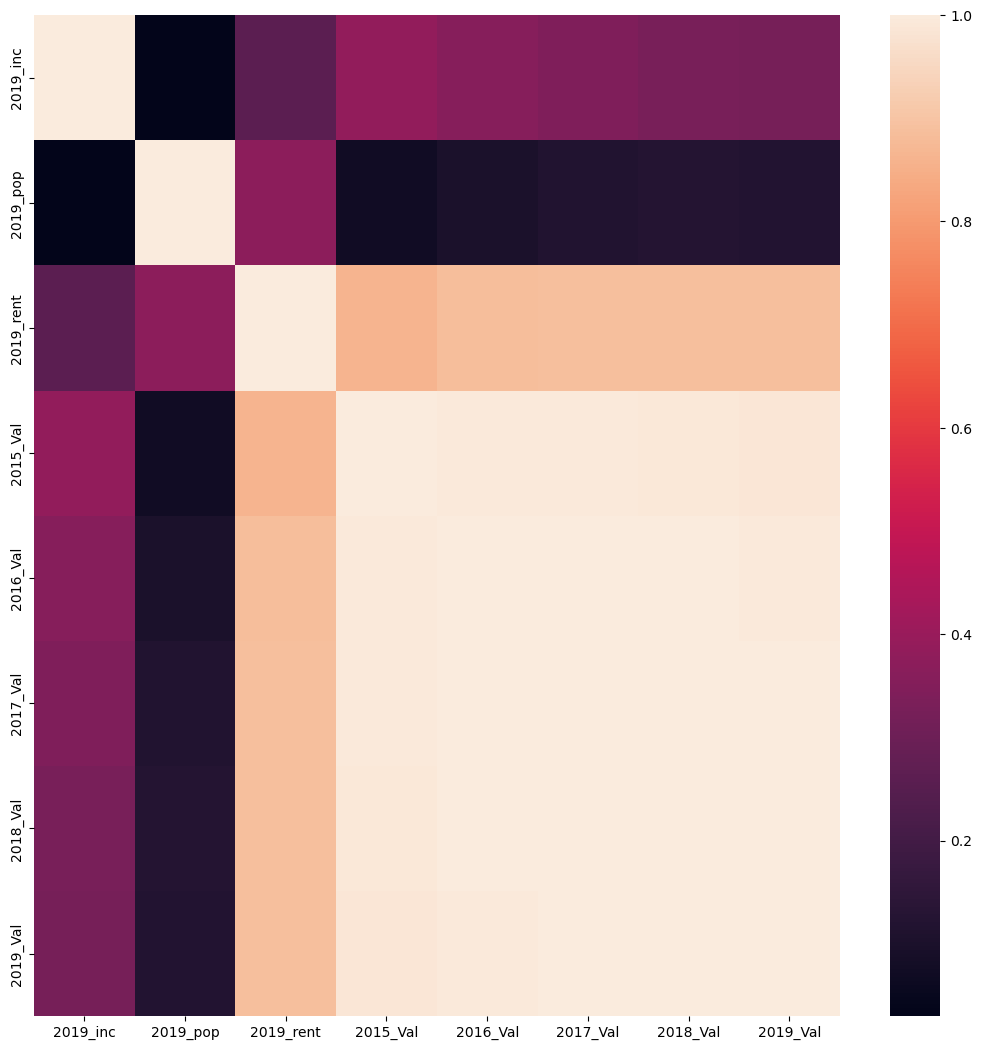

In [129]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

df_super_per_corr = df_super.drop(columns=['2015_inc','2016_inc','2017_inc','2018_inc','2015_pop', '2016_pop', '2017_pop', '2018_pop', '2015_rent', '2016_rent', '2017_rent', '2018_rent']).corr()

value19_df_super_per_corr = df_super_per_corr


sns.heatmap(value19_df_super_per_corr, annot=False)

In [130]:
#reads in new jobs data and cleans it to 2010 and 2023 and percent change

file_path_job = Path("Resources/job_data_2023.csv")
df_job = pd.read_csv(file_path_job)
df_job = df_job.drop(columns=['U.S. Rank','% Change','Job Growth (In Thousands)'])
df_job = df_job.set_index('State')
df_job
df_job['Percent Change'] = (df_job['# of Jobs 2022'] - df_job['# of Jobs 2010']) / df_job['# of Jobs 2010'] * 100
df_job1 = df_job.drop(df_job.index[52:253])
df_job1.head()

In [131]:
#reads in new population  data and cleans it to 2010 and 2023 and percent change
file_path_pop = Path("Resources/pop_data_2023.csv")
df_pop = pd.read_csv(file_path_pop)
df_pop = df_pop.set_index('state')
df_pop['growthSince2010'] = df_pop['growthSince2010'] * 100 
df_pop.head()

In [ ]:
# Import geopandas library
import geopandas as gpd

# Load file has coordinated for where the state information goes on the graphic... very intresting Geo pandas
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

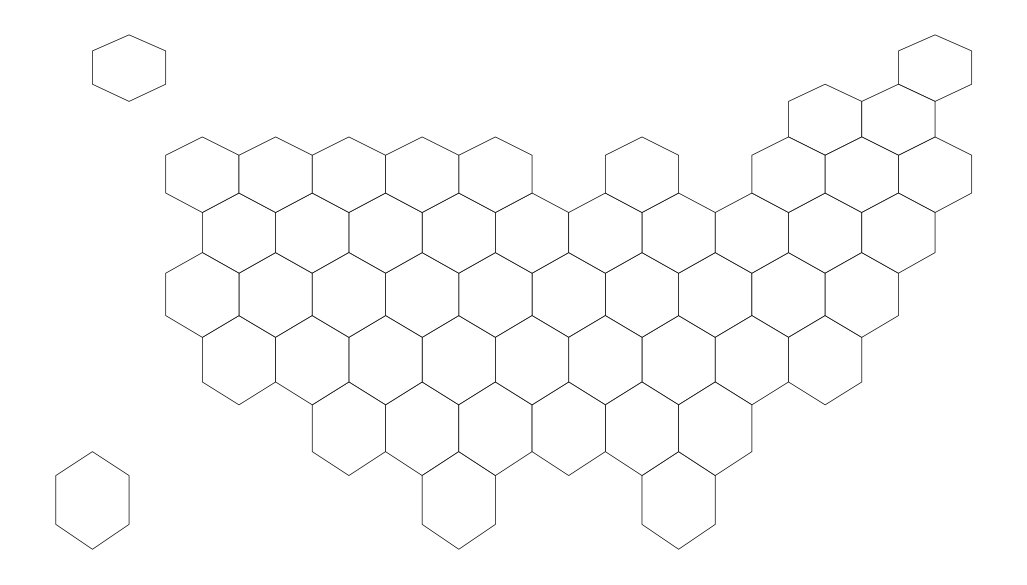

In [147]:
# Import the geoplot library.
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=13,13

# Draw a map with matplotlib
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

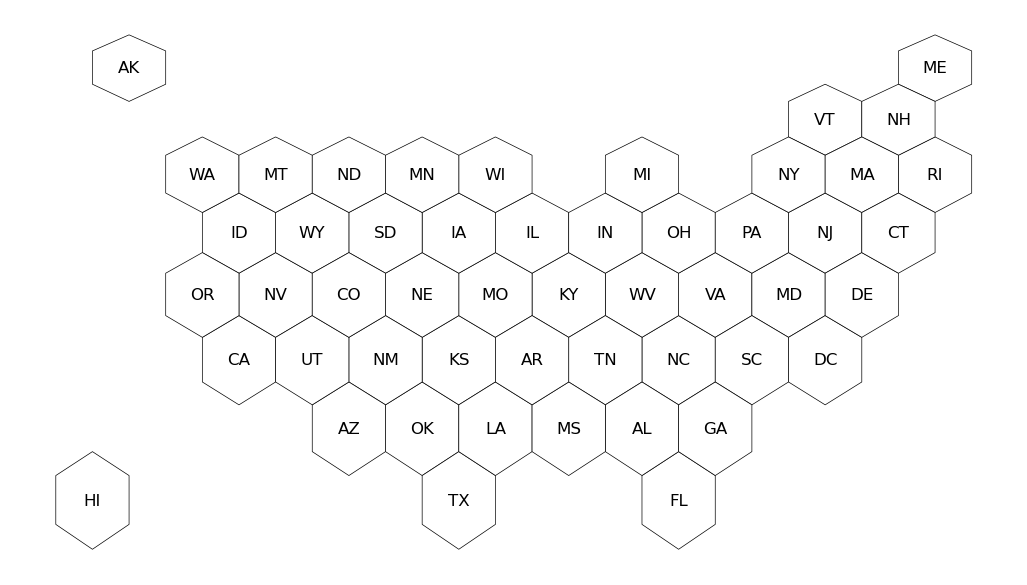

In [148]:
# add a "centroid" column with the centroid position of each county
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# redraw the empty hexbin map:
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    plt.annotate(text=row['iso3166_2'], xy=row['centroid'].coords[0],fontsize=12, horizontalalignment='center', va='center')
    # Initialize the figure


In [149]:
geoData.head()

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,state
iso3166_2,,,,,,,,,,
ME,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408...",POINT (-72.62574 53.45575),Maine
RI,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544...",POINT (-72.62574 47.46420),Rhode Island
VT,1218,2015-05-13T22:25:00+00:00,2015-10-05T16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570...",POINT (-80.79436 50.55498),Vermont
OK,231,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5...",POINT (-110.74597 33.18126),Oklahoma
NC,244,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.53010, -88.96298 38.307...",POINT (-91.68585 37.03536),North Carolina


In [150]:
geoData['state'] = geoData['google_name'].str.replace(' \(United States\)','')
geoData.head()

/Users/antonio/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,state
iso3166_2,,,,,,,,,,
ME,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408...",POINT (-72.62574 53.45575),Maine
RI,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544...",POINT (-72.62574 47.46420),Rhode Island
VT,1218,2015-05-13T22:25:00+00:00,2015-10-05T16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570...",POINT (-80.79436 50.55498),Vermont
OK,231,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5...",POINT (-110.74597 33.18126),Oklahoma
NC,244,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.53010, -88.96298 38.307...",POINT (-91.68585 37.03536),North Carolina


In [151]:
#JOIN MY DATA
geoData = geoData.set_index('iso3166_2',drop=False)
geoData = geoData.join(df_super, rsuffix='_house_Value').join(df_job1, rsuffix='_job').join(df_pop)
geoData.head()

NameError: name 'df_job1' is not defined

KeyError: '2015_inc'

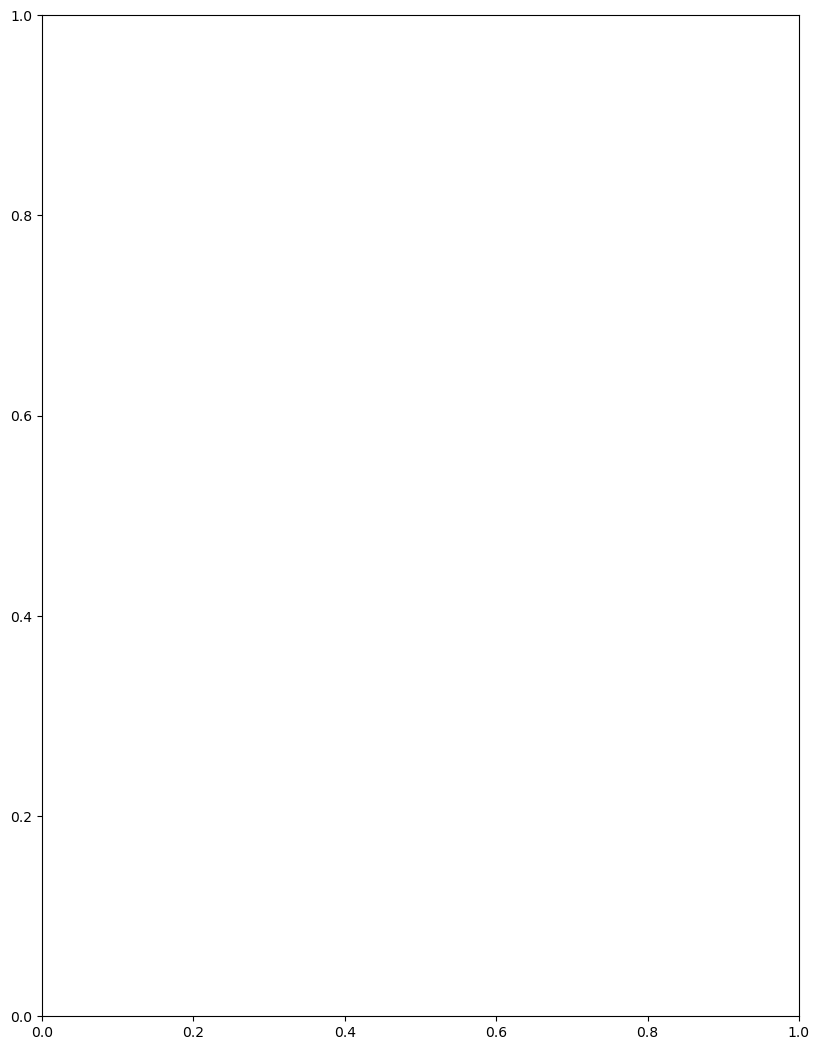

In [138]:
#test if working with my data from super correlation dataframe
geoData.plot(column="2015_inc");

KeyError: 'Percent Change'

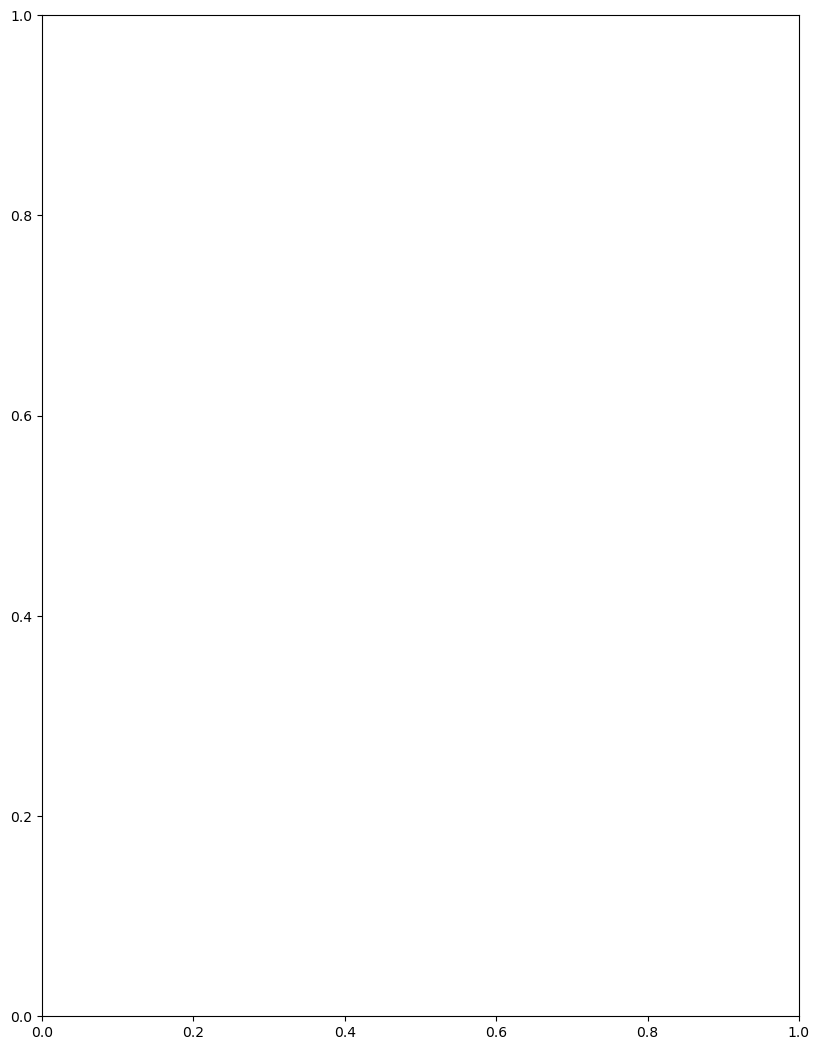

In [139]:
#makes size of plot
fig, ax = plt.subplots(1, figsize=(13, 13))


#plots data, annotates it and puts the state names + puts a colorbar to show scale

geoData.plot(
    ax=ax,
    column="Percent Change", 
    cmap="BuPu", 
    norm=plt.Normalize(vmin=-2, vmax=50),
    edgecolor='white', 
    linewidth=.5
);

ax.axis('off');

ax.annotate('percentage Job Growth 2010 - 2023', xy=(350,550),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('Yessir', xy=(350,525),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate('python-graph-gallery.com', xy=(900,0),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#808080')

for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color="black",
        zorder=3
    )
    
    sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=-2, vmax=50))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );
   

In [140]:
#used to create the normalize min and max for color scale.
print(geoData['2015_inc'].min())
print(geoData['2015_inc'].max())


KeyError: '2015_inc'

KeyError: '2015_inc'

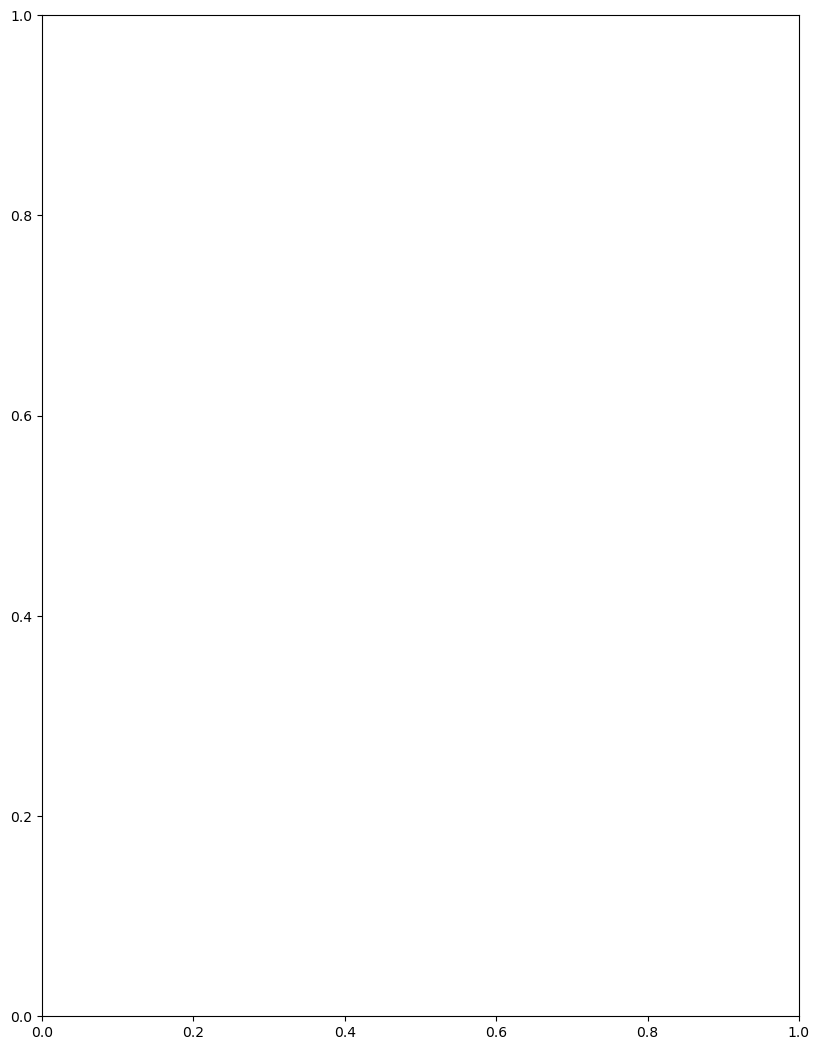

In [141]:
#size of plot
fig, ax = plt.subplots(1, figsize=(13, 13))


#plots data, annotates it and puts the state names + puts a colorbar to show scale

geoData.plot(
    ax=ax,
    column="2015_inc", 
    cmap="BuPu", 
    norm=plt.Normalize(vmin=38708.0, vmax=61470.0),
    edgecolor='white', 
    linewidth=.5
);

ax.axis('off');

ax.annotate('Average Real Income 2019', xy=(350,550),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('Yessir', xy=(350,525),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate('python-graph-gallery.com', xy=(900,0),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#808080')

for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color="black",
        zorder=3
    )
    
    sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=38708.0, vmax=61470.0))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );
   

In [ ]:
#used to create the normalize min and max for color scale.
print(geoData['growthSince2010'].min())
print(geoData['growthSince2010'].max())


KeyError: 'growthSince2010'

In [142]:
#takes zillow data and cleans it into just data by city 2023
file_pathr = Path("Resources/City_zori_sm_month.csv")
df_rent2 = pd.read_csv(file_pathr)

file_pathv = Path("Resources/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df_value_city = pd.read_csv(file_pathv)


df_value_city = df_value_city.set_index(['RegionName','State'])
df_value_city = df_value_city.drop(columns = [ '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31', '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31', '2004-11-30', '2004-12-31', '2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30', '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31', '2005-09-30', '2005-10-31', '2005-11-30', '2005-12-31', '2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30', '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31', '2006-09-30', '2006-10-31', '2006-11-30', '2006-12-31', '2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30', '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31', '2007-09-30', '2007-10-31', '2007-11-30', '2007-12-31', '2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31', '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'])

df_value_city

,,RegionID,SizeRank,RegionType,StateName,Metro,CountyName,2023-01-31
RegionName,State,,,,,,,
New York,NY,6181,0,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,629516.303341
Los Angeles,CA,12447,1,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,890194.164509
Houston,TX,39051,2,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,255921.337783
Chicago,IL,17426,3,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,276299.085040
San Antonio,TX,6915,4,city,TX,"San Antonio-New Braunfels, TX",Bexar County,257774.984016
...,...,...,...,...,...,...,...,...
Medicine Park,OK,22420,28439,city,OK,"Lawton, OK",Comanche County,229593.401556
Maud,TX,49589,28439,city,TX,"Texarkana, TX-AR",Bowie County,108007.719159
Newcastle,NE,12973,28439,city,NE,"Sioux City, IA-NE-SD",Dixon County,89979.603905


In [143]:
#takes zillow data and cleans it into just data by city 2023
file_pathr = Path("Resources/City_zori_sm_month.csv")
df_rent_city = pd.read_csv(file_pathr)

df_rent_city = df_rent_city.drop(columns=['2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'])

#DOUBLE INDEX
df_rent_city = df_rent_city.set_index(['RegionName','State'])


In [144]:
#creates data for price/ rent ratio
df_pr = df_value_city.join(df_rent_city, rsuffix='_rent')

In [145]:
df_pr.loc['Dallas','TX']

,,RegionID,SizeRank,RegionType,StateName,Metro,CountyName,2023-01-31,RegionID_rent,SizeRank_rent,RegionType_rent,StateName_rent,Metro_rent,CountyName_rent,2023-01-31_rent
RegionName,State,,,,,,,,,,,,,,
Dallas,TX,38128,9,city,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,298411.001669,38128.0,9.0,city,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,1754.442508


KeyError: 'growthSince2010'

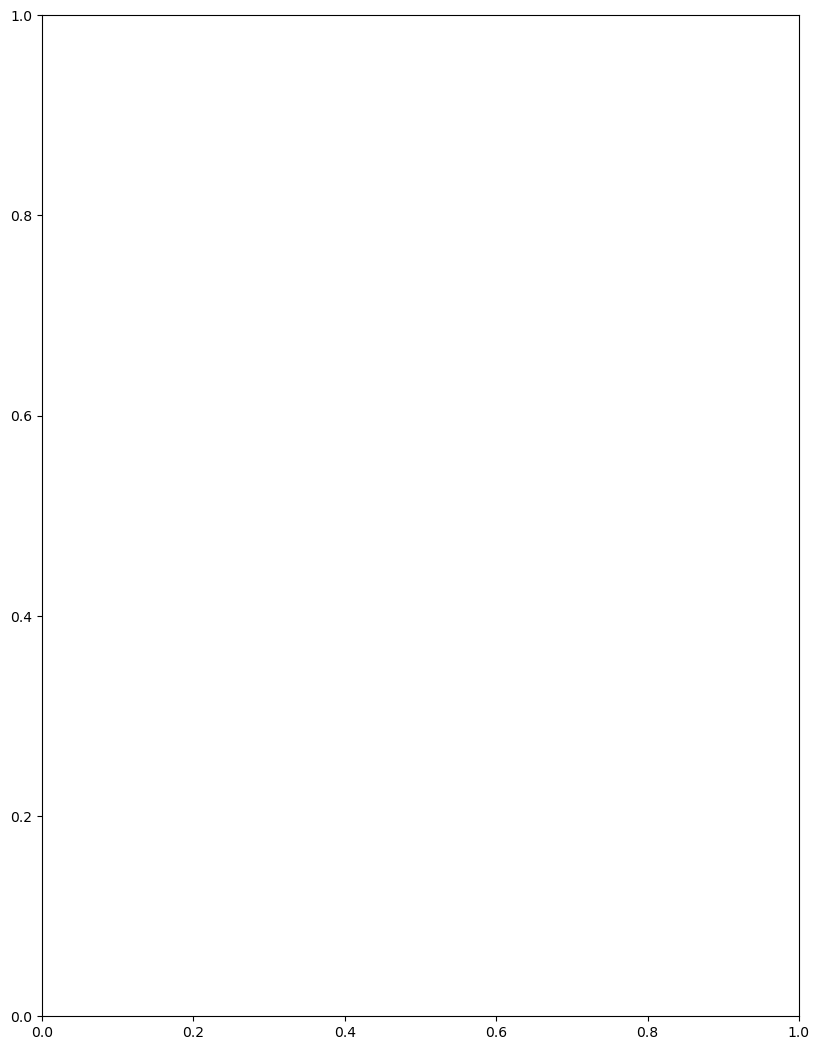

In [146]:
#makes size of plot
fig, ax = plt.subplots(1, figsize=(13, 13))

#plots data, annotates it and puts the state names + puts a colorbar to show scale

geoData.plot(
    ax=ax,
    column="growthSince2010", 
    cmap="BuPu", 
    norm=plt.Normalize(vmin=-5, vmax=25),
    edgecolor='white', 
    linewidth=.5
);

ax.axis('off');

ax.annotate('percentage population Growth 2010 - 2023', xy=(350,550),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('Yessir', xy=(350,525),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate('python-graph-gallery.com', xy=(900,0),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#808080')

for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color="black",
        zorder=3
    )
    
    sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=-5, vmax=25))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );
   

In [ ]:
PR_Ratio = df_pr.loc[[('Dallas', 'TX'),('Austin', 'TX'),('San Antonio', 'TX'),('Houston', 'TX'),('Atlanta', 'GA'), ('Charlotte', 'NC'),('Jacksonville', 'FL'),('Tampa', 'FL'),('Orlando', 'FL'),('Miami', 'FL')], 'P/R Ratio']

PR_Ratio = pd.DataFrame(PR_Ratio)
PR_Ratio.plot.bar()

# # top 10 cities
# Dallas, TX
# Austin, TX
# San Antonio, TX
# Houston, TX
# Atlanta, GA
# Charlotte, NC
# Jacksonville, FL
# Tampa, FL
# Orlando, FL
# Miami, FL



KeyError: 'P/R Ratio'